## Microsoft Principles of Machine Learning - Final Project

### Challenge Overview

In 1998, the Adventure Works Cycles company collected a large volume of data about their existing customers, including demographic features and information about purchases they have made. The company is particularly interested in analyzing customer data to determine any apparent relationships between demographic features known about the customers and the likelihood of a customer purchasing a bike. Additionally, the analysis should endeavor to determine whether a customer's average monthly spend with the company can be predicted from known customer characteristics.

In this project, you must tackle three challenges:

<ul>Challenge 1: Explore the data and gain some insights into Adventure Works customer characteristics and purchasing behavior.</ul>
<ul>Challenge 2: Build a classification model to predict customer purchasing behavior.</ul>
<ul>Challenge 3: Build a regression model to predict customer purchasing behavior.</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import scipy.stats as ss
import math

data = pd.read_csv("Processed Dataset.csv")

In [2]:
# preview the data
data.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1


In [3]:
# print the shape of the data
data.shape

(16519, 26)

### Data Preparation

In [4]:
# drop columns with missing data
data.drop(columns=["Title", "MiddleName", "Suffix", "AddressLine2"], inplace=True)

In [5]:
# check no columns with missing data remain
data.isnull().sum()

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Age                     0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
AveMonthSpend           0
BikeBuyer               0
dtype: int64

In [6]:
# check for duplicate addresses
data['AddressLine1'].duplicated().sum()

4640

In [7]:
# check for duplicate customer ids
data['CustomerID'].duplicated().sum()

115

In [8]:
# check for duplicate entries on subset
data.duplicated(subset=['AddressLine1', 'CustomerID']).sum()

98

In [9]:
# check for all duplicate rows
data.duplicated().sum()

98

In [10]:
# explore duplicated rows
data.loc[data.duplicated(), :].head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
2420,11430,Casey,Yuan,Hunzinger Allee 153,Bottrop,Nordrhein-Westfalen,Germany,46236,1 (11) 500 555-0184,24/03/1952,...,Professional,F,M,1,2,1,4,99356,70,0
2421,13701,Haley,Scott,2905 Limeridge Drive,Newton,British Columbia,Canada,V2M1N7,384-555-0163,23/11/1974,...,Clerical,F,S,1,1,3,3,46333,65,0
2509,11285,Jeremy,Anderson,7655 Greer Ave,Fremont,California,United States,94536,940-555-0176,19/03/1962,...,Professional,M,M,0,4,3,3,164943,141,1
2976,11748,Blake,Hill,1315 Norse Drive,Victoria,British Columbia,Canada,V8V,171-555-0174,18/07/1958,...,Professional,M,M,1,1,4,5,121938,145,1
3168,14532,Barbara,Wu,"818, rue de Berri",Courbevoie,Hauts de Seine,France,92400,1 (11) 500 555-0150,21/11/1962,...,Clerical,F,M,1,0,0,1,31886,51,0


In [11]:
# drop all duplicated entries
data = data.drop_duplicates()

In [12]:
data.shape

(16421, 22)

### Data Exploration

In [13]:
# find mean, median, min and max ave month spend
data.describe()

,CustomerID,Age,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,16421.000000,16421.000000,16421.000000,16421.000000,16421.000000,16421.000000,16421.000000,16421.000000,16421.000000
mean,20237.520370,35.448328,0.674198,1.499604,0.991170,2.004750,78139.218501,72.397783,0.332318
std,5340.379938,11.242162,0.468688,1.138819,1.514239,1.682496,39724.552017,27.272844,0.471059
min,11000.000000,17.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,15615.000000,27.000000,0.000000,1.000000,0.000000,0.000000,47816.000000,52.000000,0.000000
50%,20228.000000,34.000000,1.000000,2.000000,0.000000,2.000000,76134.000000,68.000000,0.000000
75%,24860.000000,43.000000,1.000000,2.000000,2.000000,3.000000,105203.000000,84.000000,1.000000
max,29482.000000,87.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


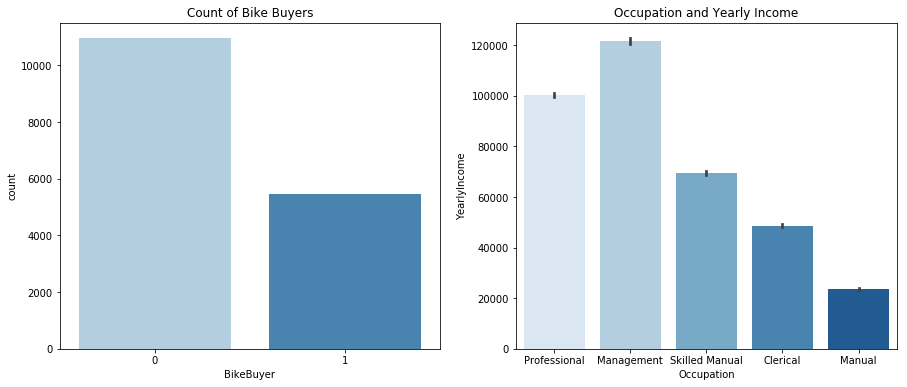

In [14]:
# explore bike buyers and yearly income by occupation
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title("Count of Bike Buyers")
axes[1].set_title("Occupation and Yearly Income")
sns.countplot(x='BikeBuyer', data=data, palette="Blues", ax=axes[0]);
sns.barplot(data=data, x='Occupation', y='YearlyIncome',palette="Blues", ax=axes[1]);

In [15]:
data.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,08/04/1966,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,14/05/1965,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,12/08/1965,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,15/02/1968,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,08/08/1968,...,Professional,F,S,1,4,5,5,92771,95,1


I created an Age column within Excel before loading based upon the difference between BirthDate and the year the data was collected, 01/01/1998.

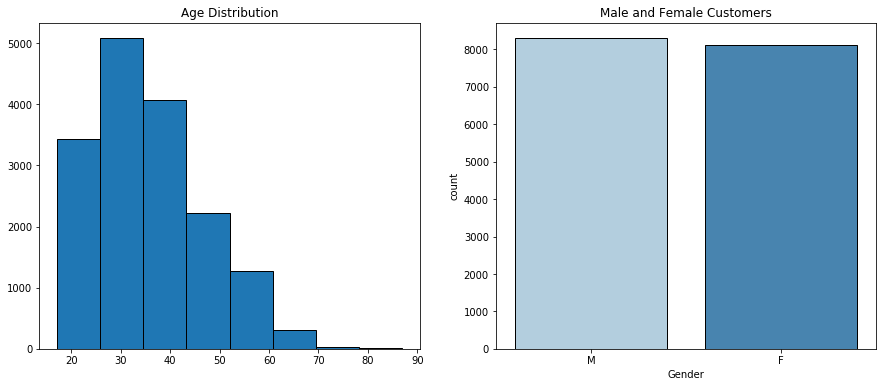

In [16]:
# explore customers 
fx, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].set_title("Age Distribution")
axes[1].set_title("Male and Female Customers")

data['Age'].hist(grid=False, bins=8, edgecolor='black', ax=axes[0]);

sns.countplot(x='Gender', data=data, palette="Blues", edgecolor="black", ax=axes[1]);
plt.show()

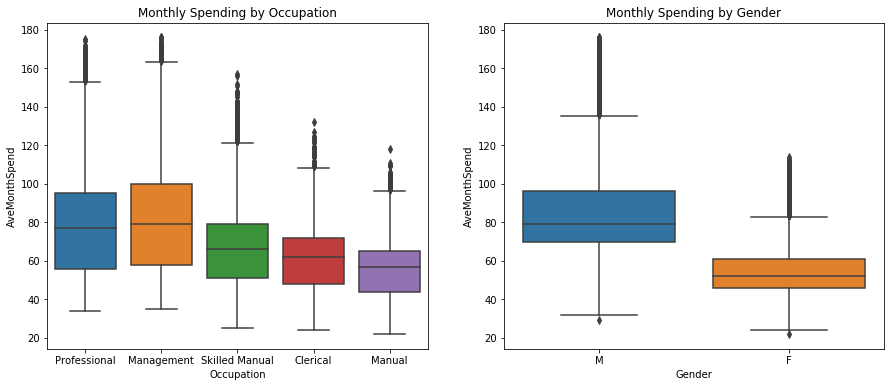

In [17]:
# explore which group of customers accounts for the highest AveMonthSpend values
fx, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].set_title("Monthly Spending by Occupation")
axes[1].set_title("Monthly Spending by Gender")

sns.boxplot(data=data, x='Occupation', y='AveMonthSpend', ax=axes[0]);

sns.boxplot(data=data, x='Gender', y='AveMonthSpend', ax=axes[1]);
plt.show()



plt.show()

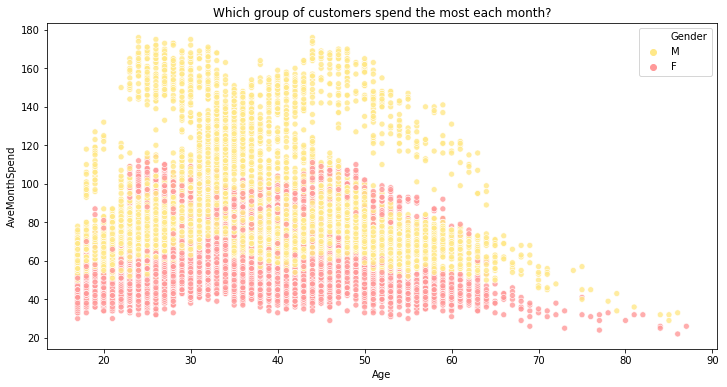

In [18]:
f,ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=data, x='Age', y="AveMonthSpend", hue="Gender",
                legend='brief', palette={'M':'#FFE888','F':'#FF9999'}, 
                alpha=0.8, ax=ax);
plt.title("Which group of customers spend the most each month?");

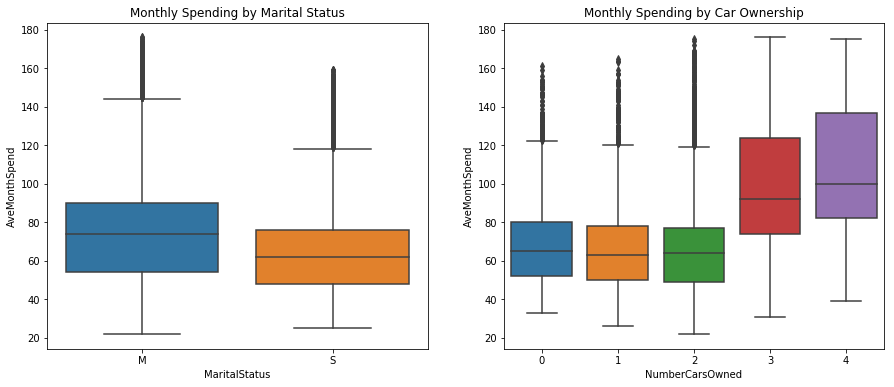

In [19]:
# explore average monthly spend further

fx, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].set_title("Monthly Spending by Marital Status")
axes[1].set_title("Monthly Spending by Car Ownership")

sns.boxplot(data=data, x='MaritalStatus', y='AveMonthSpend', ax=axes[0]);

sns.boxplot(data=data, x='NumberCarsOwned', y='AveMonthSpend', ax=axes[1]);
plt.show()



plt.show()

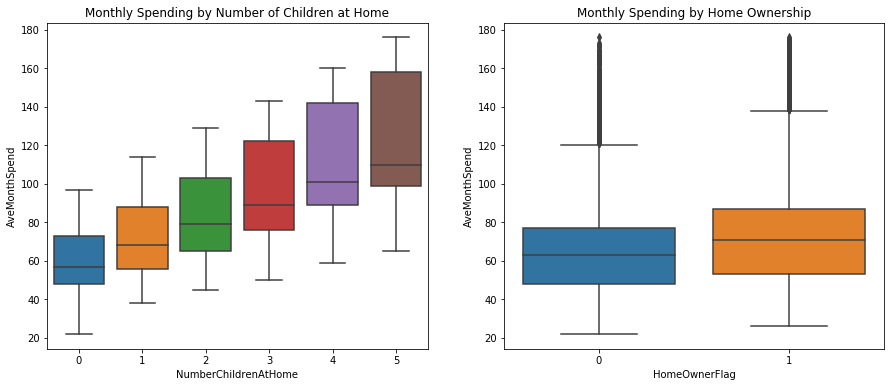

In [20]:
# explore average monthly spend further

fx, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].set_title("Monthly Spending by Number of Children at Home")
axes[1].set_title("Monthly Spending by Home Ownership")

sns.boxplot(data=data, x='NumberChildrenAtHome', y='AveMonthSpend', ax=axes[0]);

sns.boxplot(data=data, x='HomeOwnerFlag', y='AveMonthSpend', ax=axes[1]);
plt.show()



plt.show()

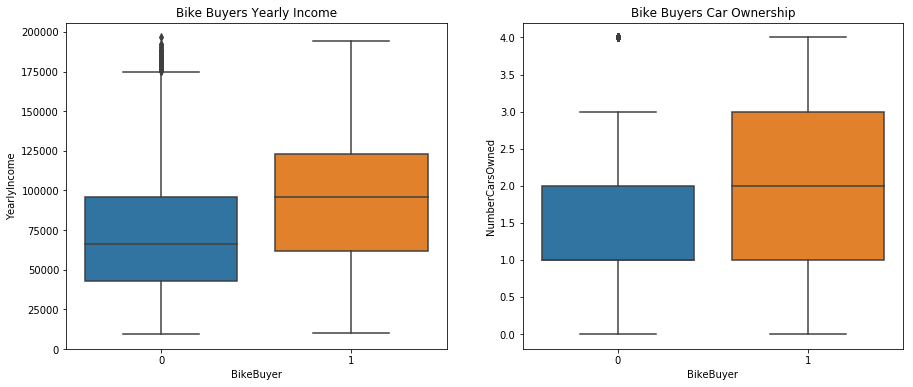

In [21]:
# explore bike buyer trends 

fx, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].set_title("Bike Buyers Yearly Income")
axes[1].set_title("Bike Buyers Car Ownership")

sns.boxplot(data=data, x='BikeBuyer', y='YearlyIncome', ax=axes[0]);

sns.boxplot(data=data, x='BikeBuyer', y='NumberCarsOwned', ax=axes[1]);

plt.show()

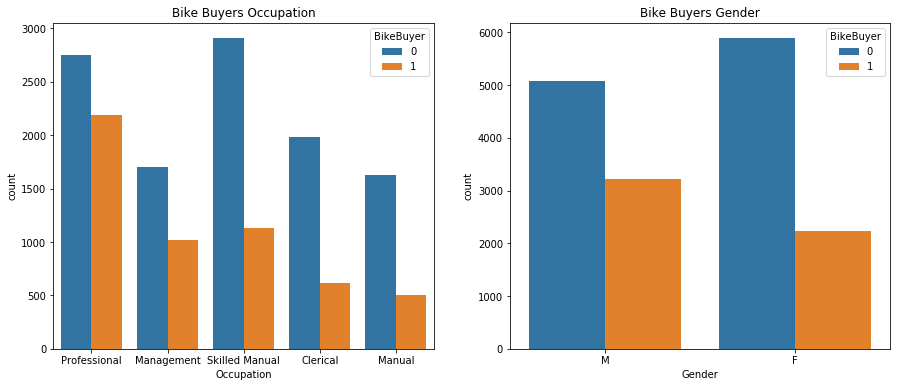

In [22]:
# explore bike buyer trends 

fx, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].set_title("Bike Buyers Occupation")
axes[1].set_title("Bike Buyers Gender")

sns.countplot(data=data, x='Occupation', hue="BikeBuyer", ax=axes[0]);

sns.countplot(data=data, x='Gender', hue="BikeBuyer", ax=axes[1]);

plt.show()

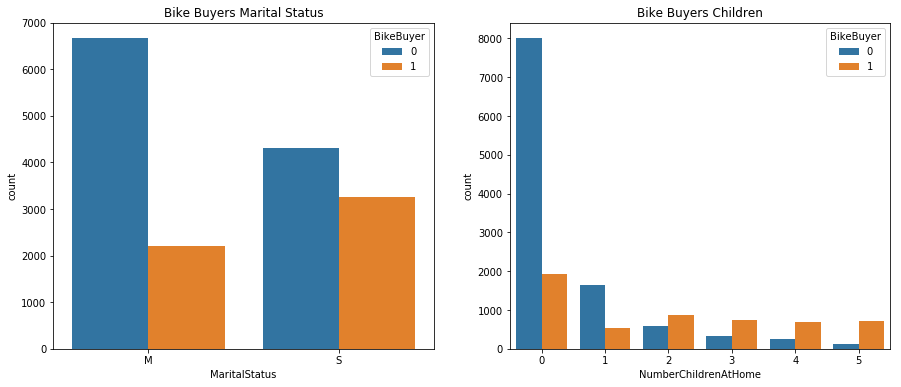

In [23]:
# explore bike buyer trends 

fx, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].set_title("Bike Buyers Marital Status")
axes[1].set_title("Bike Buyers Children")

sns.countplot(data=data, x='MaritalStatus', hue="BikeBuyer", ax=axes[0]);

sns.countplot(data=data, x='NumberChildrenAtHome', hue="BikeBuyer", ax=axes[1]);

plt.show()

### Model Preparation

You have explored and analyzed customer data collected by the Adventure Works Cycles company. Now you should be ready to apply what you have learned about the data to building, testing, and optimizing a predictive machine learning model.

Specifically, you must use any combination of Azure Machine Learning, R or Python to create a classification model that predicts whether or not a new customer will buy a bike.

First I will check the test dataset.

In [24]:
train = data
test =  pd.read_csv("AW_test.csv")

In [25]:
train.shape, test.shape

((16421, 22), (500, 23))

In [26]:
# drop columns with missing data
test.drop(columns=["Title", "MiddleName", "Suffix", "AddressLine2"], inplace=True)

In [27]:
# check for all duplicate rows
test.duplicated().sum()

0

In [28]:
test.isnull().sum()

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
dtype: int64

In [29]:
train.shape, test.shape

((16421, 22), (500, 19))

I will use Gender, MaritalStatus, HomeOwnership, NumberCars, NumberChildren and Yearly Income to predict whether or not a new cusotmer will buy a bike.

In [30]:
# encode gender and marital status
var_mod = ['Gender', 'MaritalStatus', 'Education', 'Occupation', 'City', 'StateProvinceName', 'CountryRegionName']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])

In [31]:
# encode gender and marital status
var_mod = ['Gender', 'MaritalStatus', 'Education', 'Occupation', 'City', 'StateProvinceName', 'CountryRegionName']
le = LabelEncoder()
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [32]:
train.head(1)

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,Jon,Yang,3761 N. 14th St,205,34,0,4700,1 (11) 500 555-0162,08/04/1966,...,3,1,0,1,0,0,2,137947,89,0


In [33]:
test.head(1)

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,Courtney,Baker,8727 Buena Vista Ave.,53,3,5,94536,133-555-0128,1/5/1945,0,1,0,1,0,2,0,5,86931


### Train / Test Split

In [34]:
from sklearn.model_selection import train_test_split

# target
y = train.pop('BikeBuyer').values

In [35]:
# training features
X = train.select_dtypes('number').drop(columns=['CustomerID', 'AveMonthSpend', 'Age']).values

In [36]:
# test features
test_features = test.select_dtypes('number').drop(columns=['CustomerID']).values

In [37]:
X.shape, test_features.shape

((16421, 12), (500, 12))

In [38]:
# split the training set into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [39]:
X_train.shape, X_test.shape

((13136, 12), (3285, 12))

### Standard Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

# fit the scaler based upon the training set
scaler = StandardScaler().fit(X_train)

# scale the train features array 
X_train = scaler.transform(X_train)

# scale the test features array (based on the training fit)
X_test = scaler.transform(X_test)

C:\Users\L.Spencer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\L.Spencer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\L.Spencer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Modelling

In [41]:
import sklearn.metrics as sklm
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

# build and fit the random_forest classifer using the training set
gbc = GradientBoostingClassifier()

gbc = gbc.fit(X_train, y_train)

# print the score for the training set
print(gbc.score(X_train, y_train))

0.7967417783191231


In [43]:
# apply the model to the test set and output score - held back data
gbc.score(X_test, y_test)

0.7920852359208523

In [45]:
# cross-validation
gbc_cv =cross_val_score(gbc, X, y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting Classifier is:',gbc_cv.mean())

The cross validated score for Gradient Boosting Classifier is: 0.7899033407254822


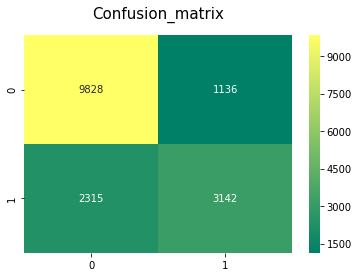

In [46]:
# cross-validated predictions of full train data in confusion matrix
y_pred = cross_val_predict(gbc, X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15);

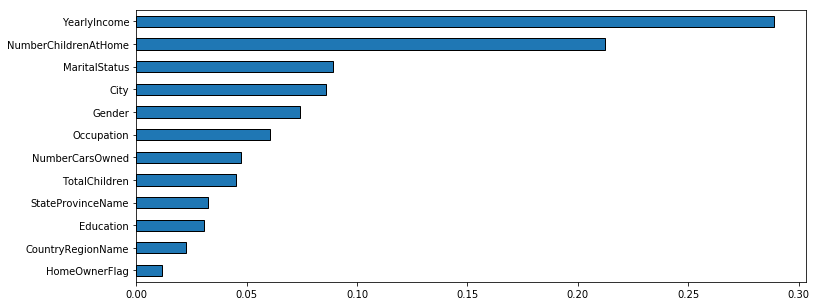

In [48]:
feature_importances = pd.Series(gbc.feature_importances_, index=['City', 'StateProvinceName', 'CountryRegionName', 'Education', 'Occupation', 'Gender','MaritalStatus','HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','YearlyIncome'])
feature_importances.sort_values(ascending=True).plot(kind="barh", edgecolor="black", color="#1F77B4", figsize=(12,5));

### Prediction

In [49]:
scaler = StandardScaler().fit(X)

# scale the train features array 
test_features = scaler.transform(test_features)

C:\Users\L.Spencer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\L.Spencer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [50]:
# fit and train the GBR and ENet using the full training set
gbc =  gbc.fit(X, y)

In [51]:
# predicting on the "test" dataset, where target is unknown

predict = gbc.predict(test_features)

print(predict)

[0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0
 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1
 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1
 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1
 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0
 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0
 0 0 1 0 0 1 0 0 0 1 1 1 

In [52]:
id_column = test['CustomerID'].values

output = pd.DataFrame()
output['CustomerID'] = id_column
output['BikeBuyer'] = predict

In [53]:
output.head()

,CustomerID,BikeBuyer
0,18988,0
1,29135,0
2,12156,0
3,13749,0
4,27780,0


In [55]:
output.to_csv("submission.csv", index=False)

### Result

This resulted in 80% grading and a high accuracy in the prediction.

<img src="Classification_Result.png">